<a href="https://colab.research.google.com/github/JuanM-GG/sistemas-dinamicos-Python/blob/main/altura_tanque.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Título: Calculo de altura en tanque

Nombre: Juan Manuel

Fecha: 19 de diciembre del 2020

Los modelos dinámicos son esenciales para entender los sistemas dinámicos en un control de ciclo abierto (modo manual) o de ciclo cerrado (modo automático). Estos modelos pueden ser derivados de datos (empíricos) o de relaciones más fundamentales (principos dísicos) que dependen en el conocimiento del proceso. Una combinación de estos dos enfoques es usada a munudo en la práctica, donde la forma de las ecuaciones son desarrolladas de ecuaciones de balances fundamentales y parámetros desconocidos o con incertidumbre son ajustados a datos del proceso. 

En ingeniería, hay cuantro comunes ecuaciones de balances de principios de conservación incluyendo masa, momento, energía, y especies. Una alternativa a los modelos con base física es usar datos de entrada y salida para desarrollar modelos dinámicos empíricos tales como sistemas de primer orden o de sugundo orden. 

# Pasos para modelamiento dinámico

Los siguientes son guías generales para desarrollar un modelo dinámico. 



1.   Identificar el objetivo de la simulación
2.   Dibujar un diagrama esquemático, etiquetando las variables del proceso
3.   Enlistar las suposiciones
4.   Determinar la dependencia espacial 
5.   Escribir los balances dinámicos (masa, especies, energía)
6.   Otras relaciones (termo, reacciones, geometría, etc.)
7. Grados de libertad, ¿Es el número de ecuaciones = número de incógnitas?
8.   Clasificar las entradas

    *   Valores fijos
    *   Perturbaciones
    *   Variables manipuladas

9.   Clasificar las salidas

    *  Estados
    * Variables de control

10.  Simplificar las ecuaciones de balance basado en suposiciones
11.  Simular las condiciones de estado estable
12.  Simular las salidas con un paso de entrada





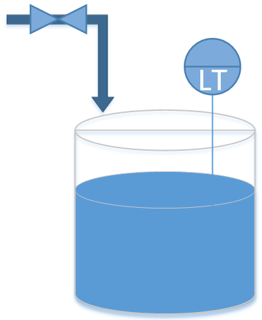

Simule la altura del tanque integrando la ecuación de balance de masa durante un período de 10 segundos. La válvula se abre al 100% en el tiempo = 2 y se cierra en el tiempo = 7. Utilice un valor de 1000 kg / m3 para la densidad y de 1,0 m2 para el área de la sección transversal del tanque. Para la válvula, suponga un coeficiente de válvula de c = 50.0 (kg / s /% abierto).

Importar liberías

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

Establecer modelo 

In [26]:
def tank(s,t,u):

  # Parameters
  c = 50 # kg/s
  pho = 1000 # kg/m^3
  A = 1.0 # m^2

  # Variables
  h = s[0]

  # Mass balance
  dhdt = (c/(pho*A))*u

  return dhdt

Establecer condiciones iniciales 

In [27]:
h0 = 0

Establecer tiempo de simulación 

In [28]:
t = np.linspace(0,10,100)

Establecer entrada

In [29]:
u = np.zeros(len(t))
u[20:70] = 1

Crear vector para guardar valores de altura 

In [19]:
h = np.zeros(len(t))

In [30]:
for i in range(len(t)-1):

  ts = [t[i], t[i+1]]
  out = odeint(tank, h0,ts,args =(u[i], ))
  h0 = out[-1,0]
  h[i+1] = out[-1,0]


Text(0.5, 0, 'Time (s)')

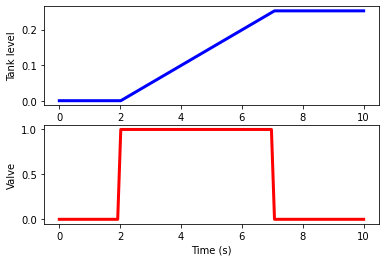

In [31]:
plt.subplot(2,1,1)
plt.plot(t,h,"b-", linewidth = 3)
plt.ylabel("Tank level")
plt.subplot(2,1,2)
plt.plot(t,u,"r-", linewidth = 3)
plt.ylabel("Valve")
plt.xlabel("Time (s)")

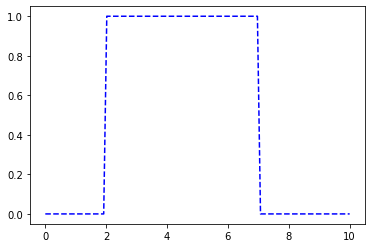

In [24]:
plt.plot(t,u,"b--")